# Exploratory Data Analysis of CrossFit Open 2019

In [223]:
# pip install jupyterlab "ipywidgets>=7.5"
# jupyter labextension install jupyterlab-plotly@4.14.3
# jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.14.3
# pip install squarify

# import relevant libraries

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import math
import plotly.io as pio
from matplotlib import pyplot as plt
import squarify

import warnings

# set options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.plotting.backend = "plotly"
pio.renderers.default = 'iframe' # or 'notebook' or 'colab'

In [224]:
# read clean Open 2019 dataset
df_19 = pd.read_csv('./data/2019_opens_clean.csv')

In [225]:
df_19 = df_19.loc[:, ~df_19.columns.str.contains('^Unnamed')]

In [226]:
df_19.shape

(338538, 76)

In [227]:
df_19.head()

,competitorid,firstname,lastname,gender,countryoforiginname,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division,rank_1,rank_2,rank_3,rank_4,rank_5,time_1,time_2,time_3,time_4,time_5,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,score_1,score_2,score_3,score_4,score_5,bs_backsquat,bs_cleanandjerk,bs_snatch,bs_deadlift,bs_fightgonebad,bs_maxpull_ups,bs_fran,bs_grace,bs_helen,bs_filthy50,bs_sprint400m,bs_run5k,w1_reps_total,w1_reps_wbs,w1_cals_row,w1_rounds_completed,w2_reps_total,w2_reps_t2b,w2_reps_du,w2_reps_sqcl,w2_rounds_completed,w2_tiebreak,w3_reps_total,w3_5ft_reps_ohl,w3_reps_dbbsu,w3_reps_hspu,w3_hspu_status,w3_5ft_reps_hsw,w3_rounds_completed,w3_tiebreak,w4_reps_total,w4_reps_sn,w4_reps_bp,w4_reps_bmu,w4_bmu_status,w4_rounds_completed,w4_tiebreak,w5_reps_total,w5_reps_thr,w5_reps_c2bpu,w5_rounds_completed,BMI
0,86,Justin,Bergh,M,United States,19273,CrossFit HQ,37.0,1.96,102.06,53022,304948,0,Men (35-39),15232,58534,59298,85576,86308,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,13040000,11670764,10980237,10720255,11350000,151.0,120.0,95.0,188.0,393.0,32.0,226.0,174.0,496.0,1287.0,64.0,1325.0,304.0,152.0,152.0,8.00,167.0,50.0,100.0,17.0,1.88,436.0,98.0,40.0,50.0,8.0,1.0,0.0,2.16,363.0,72.0,30.0,36.0,6.0,1.0,1.09,465.0,135.0,75.0,60.0,2.36,26.567055
1,88,Cary,Hair,M,United States,625,CrossFit Santa Cruz,34.0,1.83,86.64,4361,37192,0,Men,5891,5456,7199,13060,5586,900.0,720.0,600.0,720.0,882.0,0,0,0,0,0,13240000,12620599,11330328,11170505,12100318,206.0,142.0,120.0,234.0,407.0,54.0,140.0,109.0,448.0,1103.0,54.0,1294.0,324.0,171.0,153.0,8.53,262.0,75.0,150.0,37.0,2.98,601.0,133.0,40.0,50.0,43.0,1.0,0.0,2.86,NaN,117.0,30.0,60.0,27.0,1.0,1.77,215.0,210.0,105.0,105.0,5.00,25.871182
2,92,Tim,Chan,M,United States,20635,CrossFit SoCal,49.0,1.68,73.03,117405,564929,0,Men (45-49),155079,102548,127946,76177,103179,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,11710000,11021027,10510000,10770250,11090000,102.0,92.0,70.0,138.0,NaN,35.0,262.0,281.0,645.0,1661.0,NaN,NaN,171.0,95.0,76.0,4.50,102.0,37.0,50.0,15.0,1.14,173.0,51.0,40.0,11.0,0.0,0.0,0.0,1.22,600.0,77.0,30.0,37.0,10.0,1.0,1.17,470.0,109.0,60.0,49.0,1.80,25.875142
3,93,Leif,Edmundson,M,United States,19273,CrossFit HQ,37.0,1.83,92.99,38765,237798,0,Men (35-39),50223,39468,78855,40425,28827,900.0,480.0,600.0,720.0,1200.0,0,0,0,0,0,12670000,11720803,10920171,10970472,12010000,138.0,106.0,83.0,161.0,403.0,45.0,220.0,154.0,493.0,1500.0,62.0,1239.0,267.0,134.0,133.0,7.03,172.0,50.0,100.0,22.0,1.93,397.0,92.0,40.0,50.0,2.0,1.0,0.0,2.04,429.0,97.0,30.0,48.0,19.0,1.0,1.47,248.0,201.0,105.0,96.0,4.50,27.767327
4,1617,John,Mclaughlin,M,United States,4896,CrossFit Palm Beach,51.0,1.78,84.82,12050,89855,0,Men (50-54),12686,26138,26923,13629,10479,900.0,480.0,600.0,720.0,999.0,0,0,0,0,0,13080000,11760858,11130242,11170482,12100201,161.0,115.0,88.0,197.0,NaN,50.0,146.0,154.0,444.0,NaN,NaN,NaN,308.0,156.0,152.0,8.11,176.0,50.0,100.0,26.0,1.98,342.0,113.0,40.0,50.0,23.0,1.0,0.0,2.46,358.0,117.0,30.0,60.0,27.0,1.0,1.77,238.0,210.0,105.0,105.0,5.00,26.770610


---
## Workout Descriptions

### 19.1

AMRAP'15: 19 Wallball Shots / 19 Calories Row

Rx:
* Men: 20lb medball to 10ft target
* Women: 14lb medball to 9ft target

Scaling:
* Men: 14lb medball to 10ft target
* Women: 10lb medball to 9ft target

Score: total number of reps/cals

### 19.2

For time (time cap '20):
* AMRAP'8: 25 T2B / 50 DU / 15 Squat-Clean / 25 T2B / 50 DU / 13 Squat-Clean
* AMRAP'4 (if completed before 8 minutes): 25 T2B / 50 DU / 11 Squat-Clean
* AMRAP'4 (if completed before 12 minutes): 25 T2B / 50 DU / 9 Squat-Clean
* AMRAP'4 (if completed before 16 minutes): 25 T2B / 50 DU / 7 Squat-Clean

Rx:
* Men: Squat-Clean ladder 135-185-225-275-315 lb
* Women: Squat-Clean ladder 85-115-145-175-205 lb

Scaling:

Men:
* Squat-Clean ladder 95-115-135-155-185 lb
* Hanging Knee Raises instead of Toes-2-Bar
* Single Unders instead of Double Unders

Women:
* Squat-Clean ladder 55-75-95-115-135 lb
* Hanging Knee Raises instead of Toes-2-Bar
* Single Unders instead of Double Unders

Score: total number of reps / time for finishing the whole workout

### 19.3

For time (time cap '10):
* 200ft dumbbell overhead lunges
* 50 dumbbell box step-ups
* 50 strict handstand push-ups
* 200ft handstand walk

Rx:
* Men: 50lb dumbbell & 24in box
* Women: 35lb dumbbell & 20in box

Scaling (Men and Women):
* front rack lunges instead of overhead lunges
* 5in elevated strict handstand push-ups instead of no elevation
* bear crawl instead of handstand walk

Score: total number of reps / time for finishing the whole workout

### 19.4

For total time (time cap '12):
* 3 rounds of:
  - 10 snatches
  - 12 bar-facing burpees
* 3 minutes rest before continuing
* 3 rounds of:
  - 10 bar muscle-ups
  - 12 bar-facing burpees

Rx:
* Men: 95lb barbell
* Women: 65lb barbell

Scaling:
* chin-over-bar pull-ups instead of bar muscle-ups
* step over bar on the burpees is allowed
* Men: 65lb barbell
* Women: 45lb barbell

Score: total number of reps / time for finishing the whole workout

### 19.5

33-27-21-15-9 reps for time (time cap '20) of:
* thrusters
* chest-to-bar pull-ups

Rx:
* Men: 95lb barbell
* Women: 65lb barbell

Scaling:
* jumping pull-ups instead of chest-to-bar pull-ups
* Men: 65lb barbell
* Women: 45lb barbell

Score: total number of reps / time for finishing the whole workout

---
## Distributions of Total Reps

In [86]:
# get the overallrank for top 1% of athletes
df_ta = df_19[(df_19['division']=='Men')|(df_19['division']=='Women')]
ta_1 = int(0.01*df_ta.overallrank.max())

In [126]:
#sns.set_style('white')
sns.set_context("talk")

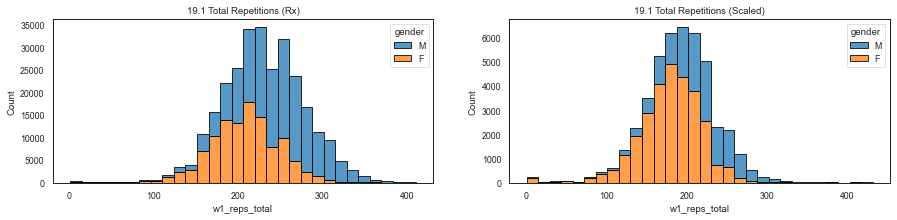

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

sns.histplot(
    ax=axes[0],
    data=df_19[df_19['scaled_1']==0],
    x='w1_reps_total',
    hue='gender',
    bins=30,
    multiple='stack',
    edgecolor='black'
).set_title('19.1 Total Repetitions (Rx)')

sns.histplot(
    ax=axes[1],
    data=df_19[df_19['scaled_1']==1],
    x='w1_reps_total',
    hue='gender',
    bins=30,
    multiple='stack',
    edgecolor='black'
).set_title('19.1 Total Repetitions (Scaled)');

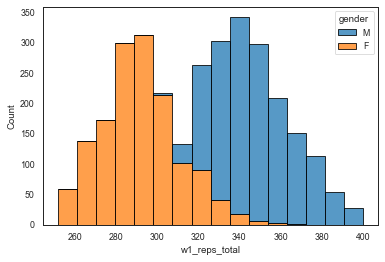

In [101]:
sns.histplot(
    data=df_ta[df_ta['overallrank']<=ta_1],
    x='w1_reps_total',
    hue='gender',
    bins=16,
    multiple='stack',
    edgecolor='black'
);

In [123]:
sns.set(rc={'axes.facecolor':'PowderBlue', 'figure.facecolor':'PowderBlue'})

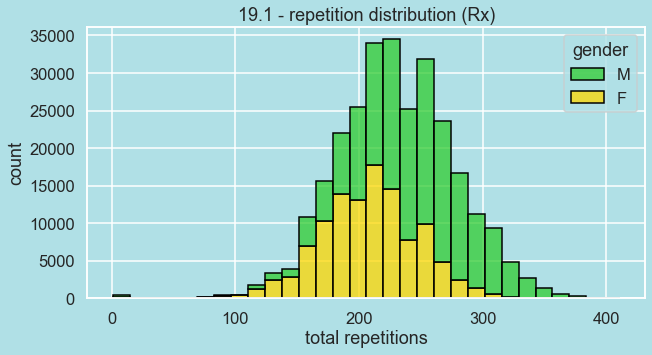

In [127]:
plt.figure(figsize=(10,5))
ax = sns.histplot(
    data=df_19[df_19['scaled_1']==0],
    x='w1_reps_total',
    hue='gender',
    bins=30,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
)
ax.set(xlabel='total repetitions', ylabel='count', title= '19.1 - repetition distribution (Rx)')
plt.savefig('images/EDA/w1_total_reps_rx.png');

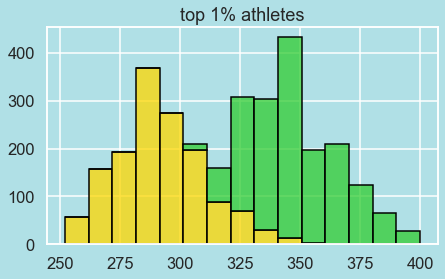

In [129]:
plt.figure(figsize=(7,4))
ax = sns.histplot(
    data=df_ta[df_ta['overallrank']<=ta_1],
    x='w1_reps_total',
    hue='gender',
    bins=15,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"},
    legend=False
)
ax.set(
    xlabel='',
    ylabel='',
    title= 'top 1% athletes')
plt.savefig('images/EDA/w1_total_reps_rx_top.png');

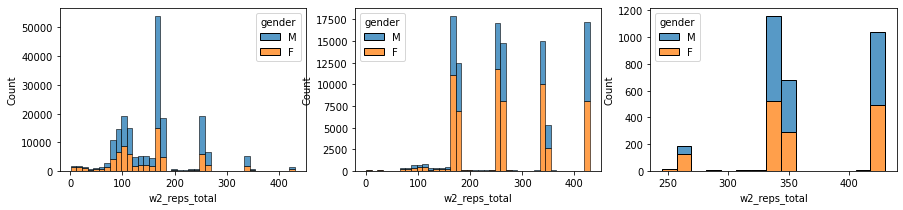

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

sns.histplot(ax=axes[0],data=df_19[df_19['scaled_2']==0],x='w2_reps_total',hue='gender',bins=40,multiple='stack')
sns.histplot(ax=axes[1],data=df_19[df_19['scaled_2']==1],x='w2_reps_total',hue='gender',bins=40,multiple='stack')
sns.histplot(ax=axes[2],data=df_ta[df_ta['overallrank']<=ta_1],x='w2_reps_total',hue='gender',bins=15,multiple='stack');

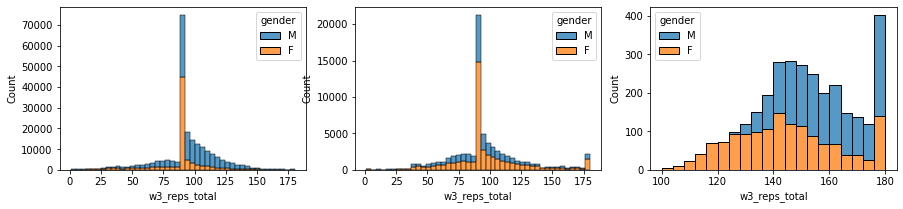

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

sns.histplot(ax=axes[0],data=df_19[df_19['scaled_3']==0],x='w3_reps_total',hue='gender',bins=45,multiple='stack')
sns.histplot(ax=axes[1],data=df_19[df_19['scaled_3']==1],x='w3_reps_total',hue='gender',bins=45,multiple='stack')
sns.histplot(ax=axes[2],data=df_ta[df_ta['overallrank']<=ta_1],x='w3_reps_total',hue='gender',bins=20,multiple='stack');

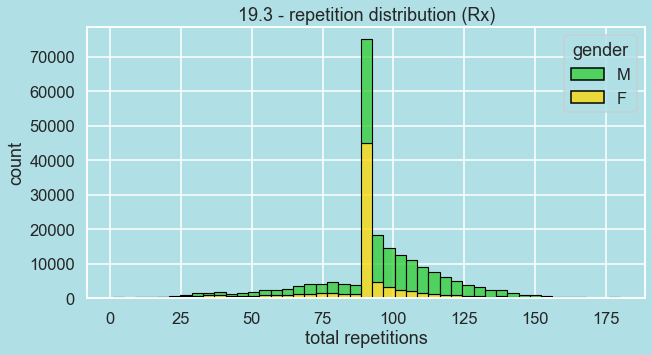

In [130]:
plt.figure(figsize=(10,5))
ax = sns.histplot(
    data=df_19[df_19['scaled_3']==0],
    x='w3_reps_total',hue='gender',
    bins=45,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
    )
ax.set(xlabel='total repetitions', ylabel='count', title= '19.3 - repetition distribution (Rx)')
plt.savefig('images/EDA/w3_total_reps_rx.png');

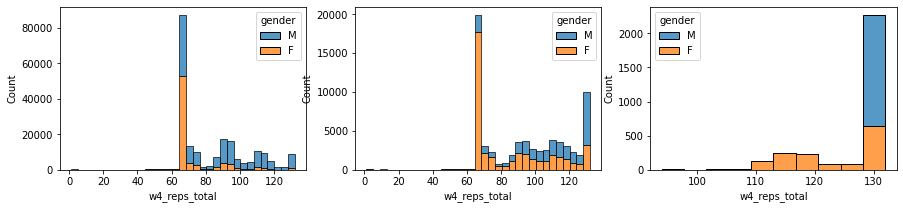

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

sns.histplot(ax=axes[0],data=df_19[df_19['scaled_4']==0],x='w4_reps_total',hue='gender',bins=33,multiple='stack')
sns.histplot(ax=axes[1],data=df_19[df_19['scaled_4']==1],x='w4_reps_total',hue='gender',bins=33,multiple='stack')
sns.histplot(ax=axes[2],data=df_ta[df_ta['overallrank']<=ta_1],x='w4_reps_total',hue='gender',bins=10,multiple='stack');

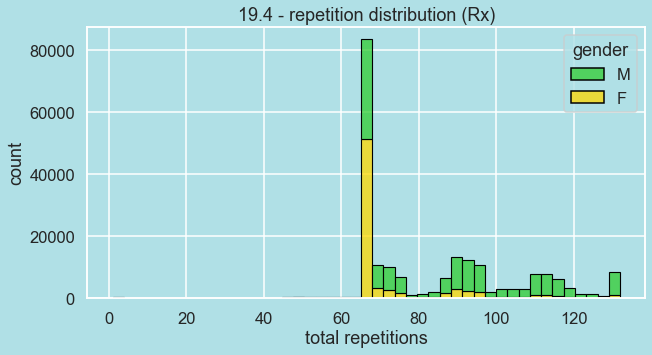

In [131]:
plt.figure(figsize=(10,5))
ax = sns.histplot(
    data=df_19[df_19['scaled_4']==0],
    x='w4_reps_total',hue='gender',
    bins=45,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
    )
ax.set(xlabel='total repetitions', ylabel='count', title= '19.4 - repetition distribution (Rx)')
plt.savefig('images/EDA/w4_total_reps_rx.png');

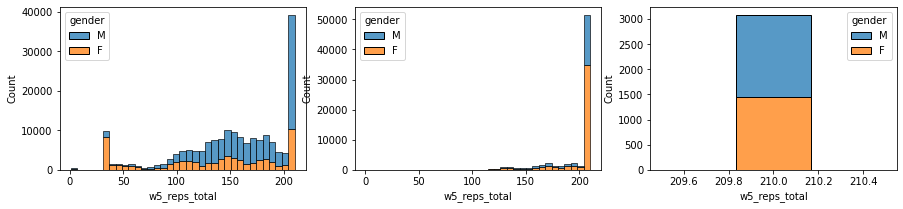

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

sns.histplot(ax=axes[0],data=df_19[df_19['scaled_5']==0],x='w5_reps_total',hue='gender',bins=35,multiple='stack')
sns.histplot(ax=axes[1],data=df_19[df_19['scaled_5']==1],x='w5_reps_total',hue='gender',bins=35,multiple='stack')
sns.histplot(ax=axes[2],data=df_ta[df_ta['overallrank']<=ta_1],x='w5_reps_total',hue='gender',bins=3,multiple='stack');

---
## Funnel Charts for 19.2 and 19.3

In [15]:
# create new feature: w2_full_rounds_completed
w2_full_rounds_completed_list = df_19['w2_rounds_completed'].to_list()
w2_full_rounds_completed = []
for i in w2_full_rounds_completed_list:
    if i < 2.0:
        w2_full_rounds_completed.append('<  8 min')
    elif i >= 2.0 and i < 3.0:
        w2_full_rounds_completed.append('< 12 min')
    elif i >= 3.0 and i < 4.0:
        w2_full_rounds_completed.append('< 16 min')
    elif i >= 4.0 and i < 5.0:
        w2_full_rounds_completed.append('< 20 min')
    elif i == 5.0:
        w2_full_rounds_completed.append('full WOD')
    else:
        w2_full_rounds_completed.append(np.NaN)
df_19['w2_full_rounds_completed'] = w2_full_rounds_completed

In [16]:
df_19[(df_19['gender']=='M')&(df_19['scaled_2']==0)&(df_19['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()

,competitorid,firstname,lastname,gender,countryoforiginname,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division,rank_1,rank_2,rank_3,rank_4,rank_5,time_1,time_2,time_3,time_4,time_5,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,score_1,score_2,score_3,score_4,score_5,bs_backsquat,bs_cleanandjerk,bs_snatch,bs_deadlift,bs_fightgonebad,bs_maxpull_ups,bs_fran,bs_grace,bs_helen,bs_filthy50,bs_sprint400m,bs_run5k,w1_reps_total,w1_reps_wbs,w1_cals_row,w1_rounds_completed,w2_reps_total,w2_reps_t2b,w2_reps_du,w2_reps_sqcl,w2_rounds_completed,w2_tiebreak,w3_reps_total,w3_5ft_reps_ohl,w3_reps_dbbsu,w3_reps_hspu,w3_hspu_status,w3_5ft_reps_hsw,w3_rounds_completed,w3_tiebreak,w4_reps_total,w4_reps_sn,w4_reps_bp,w4_reps_bmu,w4_bmu_status,w4_rounds_completed,w4_tiebreak,w5_reps_total,w5_reps_thr,w5_reps_c2bpu,w5_rounds_completed,BMI
w2_full_rounds_completed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
< 8 min,103495,103495,103495,103495,103495,103495,103495,103495,68614,74136,103495,103495,103495,103495,103495,103495,103495,103495,103495,103495,103495,95267,92509,83463,103495,103495,103495,103495,103495,103495,103495,103495,103495,103495,36468,34170,33122,37374,8567,14585,18565,14484,10923,5636,7081,13289,100523,100523,100523,100523,103495,103495,103495,103495,103495,103286,95268,95268,95268,95268,95268,95268,95268,95148,92511,92511,92511,92511,92511,92511,91146,83463,83463,83463,83463,68004
< 12 min,19407,19407,19407,19407,19407,19407,19407,19407,15310,16551,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,18728,18389,17342,19407,19407,19407,19407,19407,19407,19407,19407,19407,19407,10123,10015,9927,10144,2998,5144,7412,5729,3694,2044,2598,3850,19101,19101,19101,19101,19407,19407,19407,19407,19407,19367,18728,18728,18728,18728,18728,18728,18728,18683,18391,18391,18391,18391,18391,18391,15430,17342,17342,17342,17342,15232
< 16 min,3939,3939,3939,3939,3939,3939,3939,3939,3275,3475,3939,3939,3939,3939,3939,3939,3939,3939,3939,3939,3939,3851,3793,3665,3939,3939,3939,3939,3939,3939,3939,3939,3939,3939,2371,2376,2382,2360,768,1341,1950,1444,877,495,714,979,3906,3906,3906,3906,3939,3939,3939,3939,3939,3931,3851,3851,3851,3851,3851,3851,3851,3761,3801,3801,3801,3801,3801,3801,1039,3665,3665,3665,3665,3257
< 20 min,564,564,564,564,564,564,564,564,499,512,564,564,564,564,564,564,564,564,564,564,564,550,544,529,564,564,564,564,564,564,564,564,564,564,391,396,398,392,105,243,337,245,136,62,108,154,561,561,561,561,564,564,564,564,564,562,550,550,550,550,550,550,550,458,545,545,545,545,545,545,17,529,529,529,529,497
full WOD,135,135,135,135,135,135,135,135,130,130,135,135,135,135,135,135,135,135,135,135,133,129,130,128,135,135,135,135,135,135,135,135,135,135,100,101,103,100,35,66,89,75,42,26,46,58,133,133,133,133,135,135,135,135,135,0,129,129,129,129,129,129,129,64,130,130,130,130,130,130,0,128,128,128,128,130


In [135]:
fig = go.Figure()

df_m_rx = df_19[(df_19['gender']=='M') & (df_19['scaled_2']==0) & (df_19['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()
df_m_rx_list = list(df_m_rx.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_m_rx_list),
        sum(df_m_rx_list)-sum(df_m_rx_list[:1]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:2]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:3]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#86CE00"}))

df_f_rx = df_19[(df_19['gender']=='F') & (df_19['scaled_2']==0) & (df_19['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()
df_f_rx_list = list(df_f_rx.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_f_rx_list),
        sum(df_f_rx_list)-sum(df_f_rx_list[:1]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:2]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:3]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#FBE426"}))

fig.show()

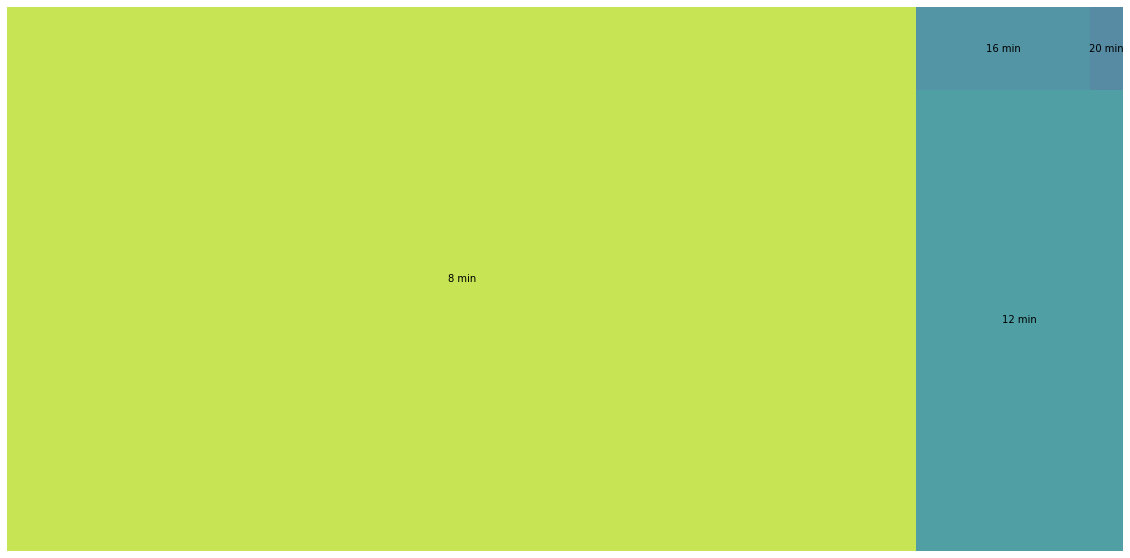

In [25]:
df_m_rx = df_19[(df_19['gender']=='M') & (df_19['scaled_2']==0) & (df_19['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()
df_m_rx_list = list(df_m_rx.competitorid)

fig, axes = plt.subplots(1, 1, figsize=(20, 10))
squarify.plot(
    sizes=[
        sum(df_m_rx_list)-sum(df_m_rx_list[:1]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:2]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:3]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:4])
    ],
    label=['8 min', '12 min', '16 min', '20 min'],
    alpha=.8 )
plt.axis('off')
plt.show()

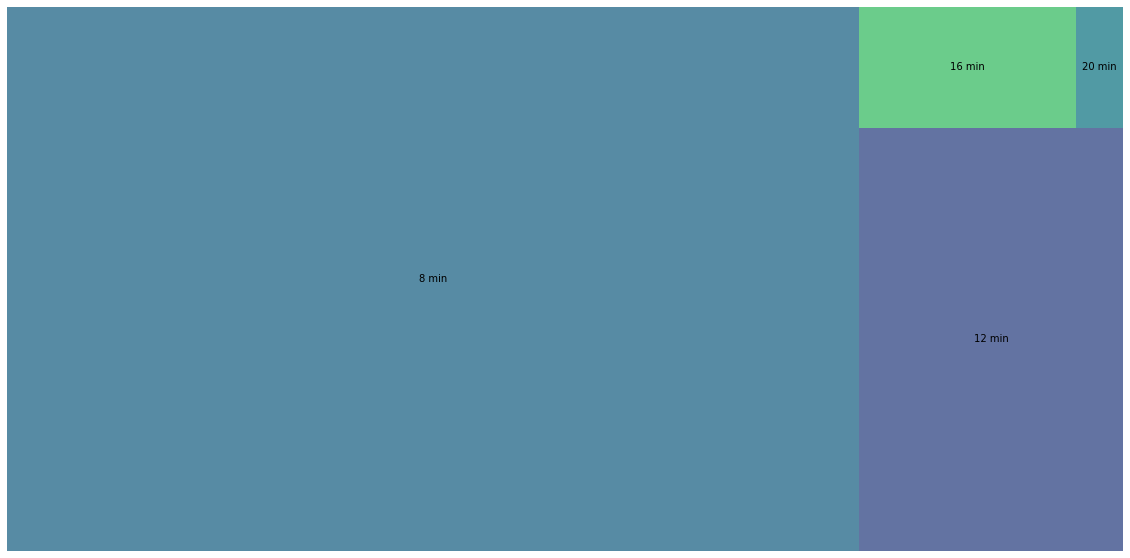

In [26]:
df_f_rx = df_19[(df_19['gender']=='F') & (df_19['scaled_2']==0) & (df_19['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()
df_f_rx_list = list(df_f_rx.competitorid)

fig, axes = plt.subplots(1, 1, figsize=(20, 10))
squarify.plot(
    sizes=[
        sum(df_f_rx_list)-sum(df_f_rx_list[:1]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:2]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:3]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:4])
    ],
    label=['8 min', '12 min', '16 min', '20 min'],
    alpha=.8 )
plt.axis('off')
plt.show()

In [27]:
df_19[(df_19['gender']=='M')&(df_19['scaled_2']==1)&(df_19['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()

,competitorid,firstname,lastname,gender,countryoforiginname,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division,rank_1,rank_2,rank_3,rank_4,rank_5,time_1,time_2,time_3,time_4,time_5,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,score_1,score_2,score_3,score_4,score_5,bs_backsquat,bs_cleanandjerk,bs_snatch,bs_deadlift,bs_fightgonebad,bs_maxpull_ups,bs_fran,bs_grace,bs_helen,bs_filthy50,bs_sprint400m,bs_run5k,w1_reps_total,w1_reps_wbs,w1_cals_row,w1_rounds_completed,w2_reps_total,w2_reps_t2b,w2_reps_du,w2_reps_sqcl,w2_rounds_completed,w2_tiebreak,w3_reps_total,w3_5ft_reps_ohl,w3_reps_dbbsu,w3_reps_hspu,w3_hspu_status,w3_5ft_reps_hsw,w3_rounds_completed,w3_tiebreak,w4_reps_total,w4_reps_sn,w4_reps_bp,w4_reps_bmu,w4_bmu_status,w4_rounds_completed,w4_tiebreak,w5_reps_total,w5_reps_thr,w5_reps_c2bpu,w5_rounds_completed,BMI
w2_full_rounds_completed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
< 8 min,14013,14013,14013,14013,14013,14013,14013,14013,5514,5777,14013,14013,14013,14013,14013,14013,14013,14013,14013,14013,14013,11254,10724,9456,14013,14013,14013,14013,14013,14013,14013,14013,14013,14013,2165,1615,1497,2332,246,576,400,299,262,117,253,754,13089,13089,13089,13089,14013,14013,14013,14013,14013,13994,11254,11254,11254,11254,11254,11254,11254,11224,10725,10725,10725,10725,10725,10725,10407,9456,9456,9456,9456,5352
< 12 min,12257,12257,12257,12257,12257,12257,12257,12257,5588,5935,12257,12257,12257,12257,12257,12257,12257,12257,12257,12257,12257,10437,10059,8931,12257,12257,12257,12257,12257,12257,12257,12257,12257,12257,2286,1826,1719,2444,323,637,470,408,372,149,294,826,11530,11530,11530,11530,12257,12257,12257,12257,12257,12236,10438,10438,10438,10438,10438,10438,10438,10381,10061,10061,10061,10061,10061,10061,8988,8931,8931,8931,8931,5479
< 16 min,7918,7918,7918,7918,7918,7918,7918,7918,3974,4298,7918,7918,7918,7918,7918,7918,7918,7918,7918,7918,7918,6841,6632,5954,7918,7918,7918,7918,7918,7918,7918,7918,7918,7918,1755,1436,1335,1842,250,498,431,368,326,130,236,622,7503,7503,7503,7503,7918,7918,7918,7918,7918,7904,6841,6841,6841,6841,6841,6841,6841,6739,6634,6634,6634,6634,6634,6634,5317,5954,5954,5954,5954,3906
< 20 min,5189,5189,5189,5189,5189,5189,5189,5189,2756,2993,5189,5189,5189,5189,5189,5189,5189,5189,5189,5189,5189,4536,4432,3998,5189,5189,5189,5189,5189,5189,5189,5189,5189,5189,1286,1085,1004,1330,191,357,386,281,264,102,175,437,4942,4942,4942,4942,5189,5189,5189,5189,5189,5182,4536,4536,4536,4536,4536,4536,4536,4388,4437,4437,4437,4437,4437,4437,3217,3998,3998,3998,3998,2717
full WOD,4210,4210,4210,4210,4210,4210,4210,4209,2272,2472,4210,4210,4210,4210,4210,4210,4210,4210,4210,4210,4165,3696,3539,3213,4210,4210,4210,4210,4210,4210,4210,4210,4210,4210,1200,1062,989,1238,233,358,412,374,255,140,178,384,3997,3997,3997,3997,4210,4210,4210,4210,4210,35,3696,3696,3696,3696,3696,3696,3696,3382,3542,3542,3542,3542,3542,3542,2407,3213,3213,3213,3213,2238


In [28]:
fig = go.Figure()

df_m_sc = df_19[(df_19['gender']=='M') & (df_19['scaled_2']==1) & (df_19['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()
df_m_sc_list = list(df_m_sc.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_m_sc_list),
        sum(df_m_sc_list)-sum(df_m_sc_list[:1]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:2]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:3]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:4])
    ],
    textinfo = "value+percent initial"))

df_f_sc = df_19[(df_19['gender']=='F') & (df_19['scaled_2']==1) & (df_19['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()
df_f_sc_list = list(df_f_sc.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_f_sc_list),
        sum(df_f_sc_list)-sum(df_f_sc_list[:1]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:2]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:3]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:4])
    ],
    textinfo = "value+percent initial"))

fig.show()

In [29]:
# create new feature: w3_full_rounds_completed
w3_full_rounds_completed_list = df_19['w3_rounds_completed'].to_list()
w3_full_rounds_completed = []
for i in w3_full_rounds_completed_list:
    if i < 1.0:
        w3_full_rounds_completed.append('out in 1st round')
    elif i >= 1.0 and i < 2.0:
        w3_full_rounds_completed.append('out in 2nd round')
    elif i >= 2.0 and i < 3.0:
        w3_full_rounds_completed.append('out in 3rd round')
    elif i >= 3.0 and i < 4.0:
        w3_full_rounds_completed.append('out in 4th round')
    elif i == 4.0:
        w3_full_rounds_completed.append('wod finished')
    else:
        w3_full_rounds_completed.append(np.NaN)
df_19['w3_full_rounds_completed'] = w3_full_rounds_completed


In [30]:
df_19[(df_19['gender']=='M')&(df_19['scaled_3']==0)&(df_19['score_3']!=0)].groupby(by='w3_full_rounds_completed').count()

,competitorid,firstname,lastname,gender,countryoforiginname,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division,rank_1,rank_2,rank_3,rank_4,rank_5,time_1,time_2,time_3,time_4,time_5,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,score_1,score_2,score_3,score_4,score_5,bs_backsquat,bs_cleanandjerk,bs_snatch,bs_deadlift,bs_fightgonebad,bs_maxpull_ups,bs_fran,bs_grace,bs_helen,bs_filthy50,bs_sprint400m,bs_run5k,w1_reps_total,w1_reps_wbs,w1_cals_row,w1_rounds_completed,w2_reps_total,w2_reps_t2b,w2_reps_du,w2_reps_sqcl,w2_rounds_completed,w2_tiebreak,w3_reps_total,w3_5ft_reps_ohl,w3_reps_dbbsu,w3_reps_hspu,w3_hspu_status,w3_5ft_reps_hsw,w3_rounds_completed,w3_tiebreak,w4_reps_total,w4_reps_sn,w4_reps_bp,w4_reps_bmu,w4_bmu_status,w4_rounds_completed,w4_tiebreak,w5_reps_total,w5_reps_thr,w5_reps_c2bpu,w5_rounds_completed,BMI,w2_full_rounds_completed
w3_full_rounds_completed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
out in 1st round,3422,3422,3422,3422,3422,3422,3422,3422,1771,1870,3422,3422,3422,3422,3422,3422,3422,3422,3422,3422,3241,3422,3013,2658,3422,3422,3422,3422,3422,3422,3422,3422,3422,3422,814,671,638,855,169,296,240,198,187,75,125,294,3312,3312,3312,3312,3241,3241,3241,3241,3241,3223,3422,3422,3422,3422,3422,3422,3422,3418,3013,3013,3013,3013,3013,3013,2971,2658,2658,2658,2658,1736,3241
out in 2nd round,24632,24632,24632,24632,24632,24632,24632,24632,13926,15006,24632,24632,24632,24632,24632,24632,24632,24632,24632,24632,22920,24632,21631,19249,24632,24632,24632,24632,24632,24632,24632,24632,24632,24632,6850,5953,5632,7139,1338,2427,2428,1990,1598,784,1101,2385,23732,23732,23732,23732,22924,22924,22924,22924,22924,22542,24632,24632,24632,24632,24632,24632,24632,24619,21632,21632,21632,21632,21632,21632,21202,19249,19249,19249,19249,13690,22924
out in 3rd round,104711,104711,104711,104711,104711,104711,104711,104711,72348,77980,104711,104711,104711,104711,104711,104711,104711,104711,104711,104711,99407,104711,97458,88871,104711,104711,104711,104711,104711,104711,104711,104711,104711,104711,40950,39075,38177,41676,10255,17374,23552,18347,13017,6860,8626,15188,102071,102071,102071,102071,99422,99422,99422,99422,99422,97607,104711,104711,104711,104711,104711,104711,104711,104631,97470,97470,97470,97470,97470,97470,93010,88871,88871,88871,88871,71790,99422
out in 4th round,4896,4896,4896,4896,4896,4896,4896,4896,3993,4286,4896,4896,4896,4896,4896,4896,4896,4896,4896,4896,4727,4896,4754,4605,4896,4896,4896,4896,4896,4896,4896,4896,4896,4896,2790,2808,2808,2785,833,1598,2245,1619,1023,574,801,1098,4821,4821,4821,4821,4727,4727,4727,4727,4727,4653,4896,4896,4896,4896,4896,4896,4896,4890,4758,4758,4758,4758,4758,4758,1526,4605,4605,4605,4605,3974,4727
wod finished,275,275,275,275,275,275,275,275,244,251,275,275,275,275,275,275,275,275,275,275,267,275,273,264,275,275,275,275,275,275,275,275,275,275,175,180,180,171,52,108,151,109,64,36,58,70,271,271,271,271,269,269,269,269,269,204,275,275,275,275,275,275,275,0,273,273,273,273,273,273,7,264,264,264,264,244,269


In [31]:
fig = go.Figure()

df_m_rx = df_19[(df_19['gender']=='M') & (df_19['scaled_3']==0) & (df_19['score_3']!=0)].groupby(by='w3_full_rounds_completed').count()
df_m_rx_list = list(df_m_rx.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['start', '1st', '2nd', '3rd', '4th'],
    x = [
        sum(df_m_rx_list),
        sum(df_m_rx_list)-sum(df_m_rx_list[:1]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:2]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:3]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:4])
    ],
    textinfo = "value+percent initial"))

df_f_rx = df_19[(df_19['gender']=='F') & (df_19['scaled_3']==0) & (df_19['score_3']!=0)].groupby(by='w3_full_rounds_completed').count()
df_f_rx_list = list(df_f_rx.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['start', '1st', '2nd', '3rd', '4th'],
    x = [
        sum(df_f_rx_list),
        sum(df_f_rx_list)-sum(df_f_rx_list[:1]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:2]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:3]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:4])
    ],
    textinfo = "value+percent initial"))

fig.show()

In [32]:
df_19[(df_19['gender']=='M')&(df_19['scaled_3']==1)&(df_19['score_3']!=0)].groupby(by='w3_full_rounds_completed').count()

,competitorid,firstname,lastname,gender,countryoforiginname,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division,rank_1,rank_2,rank_3,rank_4,rank_5,time_1,time_2,time_3,time_4,time_5,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,score_1,score_2,score_3,score_4,score_5,bs_backsquat,bs_cleanandjerk,bs_snatch,bs_deadlift,bs_fightgonebad,bs_maxpull_ups,bs_fran,bs_grace,bs_helen,bs_filthy50,bs_sprint400m,bs_run5k,w1_reps_total,w1_reps_wbs,w1_cals_row,w1_rounds_completed,w2_reps_total,w2_reps_t2b,w2_reps_du,w2_reps_sqcl,w2_rounds_completed,w2_tiebreak,w3_reps_total,w3_5ft_reps_ohl,w3_reps_dbbsu,w3_reps_hspu,w3_hspu_status,w3_5ft_reps_hsw,w3_rounds_completed,w3_tiebreak,w4_reps_total,w4_reps_sn,w4_reps_bp,w4_reps_bmu,w4_bmu_status,w4_rounds_completed,w4_tiebreak,w5_reps_total,w5_reps_thr,w5_reps_c2bpu,w5_rounds_completed,BMI,w2_full_rounds_completed
w3_full_rounds_completed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
out in 1st round,276,276,276,276,276,276,276,276,95,95,276,276,276,276,276,276,276,276,276,276,226,276,203,186,276,276,276,276,276,276,276,276,276,276,42,31,31,45,5,7,12,11,5,0,4,13,254,254,254,254,226,226,226,226,226,224,276,276,276,276,276,276,276,276,203,203,203,203,203,203,197,186,186,186,186,88,226
out in 2nd round,7905,7905,7905,7905,7905,7905,7905,7905,3116,3333,7905,7905,7905,7905,7905,7905,7905,7905,7905,7905,7127,7905,6538,5835,7905,7905,7905,7905,7905,7905,7905,7905,7905,7905,1379,1084,973,1486,185,366,289,265,216,84,182,441,7435,7435,7435,7435,7127,7127,7127,7127,7127,7028,7905,7905,7905,7905,7905,7905,7905,7903,6539,6539,6539,6539,6539,6539,6380,5835,5835,5835,5835,3018,7127
out in 3rd round,16797,16797,16797,16797,16797,16797,16797,16797,8260,8814,16797,16797,16797,16797,16797,16797,16797,16797,16797,16797,15343,16797,14595,13171,16797,16797,16797,16797,16797,16797,16797,16797,16797,16797,3306,2676,2517,3495,511,995,859,635,628,270,485,1270,15805,15805,15805,15805,15357,15357,15357,15357,15357,14288,16797,16797,16797,16797,16797,16797,16797,16780,14603,14603,14603,14603,14603,14603,11207,13171,13171,13171,13171,8150,15357
out in 4th round,1437,1437,1437,1437,1437,1437,1437,1437,810,890,1437,1437,1437,1437,1437,1437,1437,1437,1437,1437,1319,1437,1304,1208,1437,1437,1437,1437,1437,1437,1437,1437,1437,1437,305,253,237,333,52,97,101,58,59,37,46,87,1360,1360,1360,1360,1324,1324,1324,1324,1324,1071,1437,1437,1437,1437,1437,1437,1437,1435,1304,1304,1304,1304,1304,1304,934,1208,1208,1208,1208,801,1324
wod finished,717,717,717,717,717,717,717,717,421,469,717,717,717,717,717,717,717,717,717,717,669,715,660,621,717,717,717,717,717,717,717,717,717,717,157,131,124,165,31,57,51,37,31,22,24,46,675,675,675,675,674,674,674,674,674,368,717,717,717,717,717,717,717,0,660,660,660,660,660,660,265,621,621,621,621,417,674


In [33]:
fig = go.Figure()

df_m_sc = df_19[(df_19['gender']=='M') & (df_19['scaled_3']==1) & (df_19['score_3']!=0)].groupby(by='w3_full_rounds_completed').count()
df_m_sc_list = list(df_m_sc.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['start', '1st', '2nd', '3rd', '4th'],
    x = [
        sum(df_m_sc_list),
        sum(df_m_sc_list)-sum(df_m_sc_list[:1]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:2]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:3]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:4])
    ],
    textinfo = "value+percent initial"))

df_f_sc = df_19[(df_19['gender']=='F') & (df_19['scaled_3']==1) & (df_19['score_3']!=0)].groupby(by='w3_full_rounds_completed').count()
df_f_sc_list = list(df_f_sc.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['start', '1st', '2nd', '3rd', '4th'],
    x = [
        sum(df_f_sc_list),
        sum(df_f_sc_list)-sum(df_f_sc_list[:1]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:2]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:3]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:4])
    ],
    textinfo = "value+percent initial"))

fig.show()

---
## Participation in Workouts

---
## Overall Rank vs Total Workout Reps

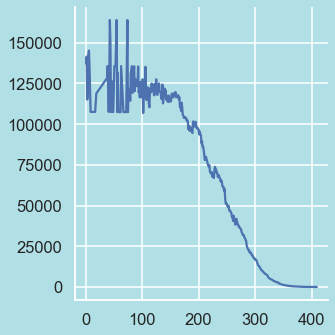

In [214]:
df=df_19[((df_19['division']=='Men')|(df_19['division']=='Women'))&(df_19['scaled_1']==0)]
a=list(df.groupby(by='w1_reps_total')['rank_1'].mean())
b=list(df.groupby(by='w1_reps_total')['w1_reps_total'])
c=[]
for i in b:
    c.append(i[0])
sns.relplot(x=c, y=a, kind="line");

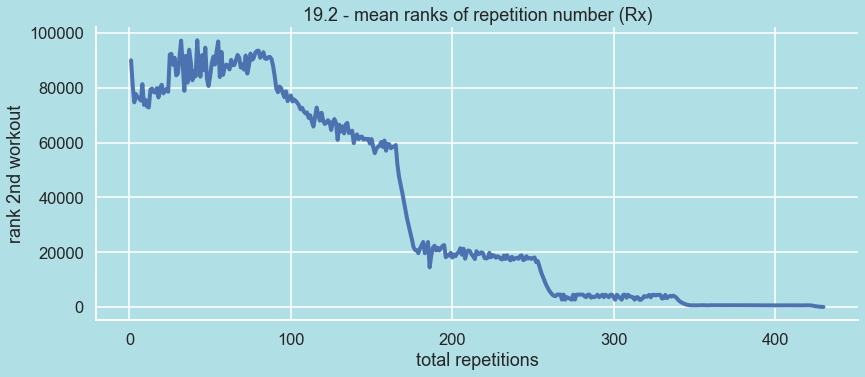

In [213]:
df=df_19[((df_19['division']=='Men')|(df_19['division']=='Women'))&(df_19['scaled_2']==0)]
a=list(df.groupby(by='w2_reps_total')['rank_2'].mean())
b=list(df.groupby(by='w2_reps_total')['w2_reps_total'])
c=[]
for i in b:
    c.append(i[0])
g = sns.relplot(x=c, y=a, kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(xlabel='total repetitions', ylabel='rank 2nd workout', title= '19.2 - mean ranks of repetition number (Rx)')
plt.savefig('images/EDA/w2_rank_rx.png');

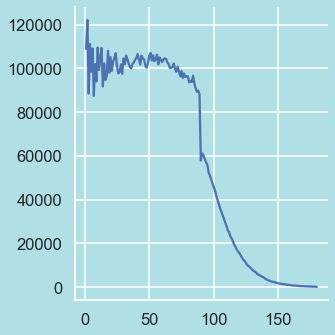

In [212]:
df=df_19[((df_19['division']=='Men')|(df_19['division']=='Women'))&(df_19['scaled_3']==0)]
a=list(df.groupby(by='w3_reps_total')['rank_3'].mean())
b=list(df.groupby(by='w3_reps_total')['w3_reps_total'])
c=[]
for i in b:
    c.append(i[0])
sns.relplot(x=c, y=a, kind="line");

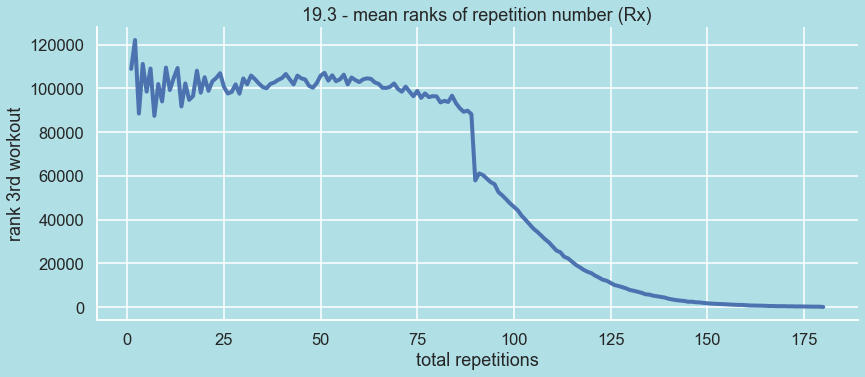

In [211]:
df=df_19[((df_19['division']=='Men')|(df_19['division']=='Women'))&(df_19['scaled_3']==0)]
a=list(df.groupby(by='w3_reps_total')['rank_3'].mean())
b=list(df.groupby(by='w3_reps_total')['w3_reps_total'])
c=[]
for i in b:
    c.append(i[0])
g = sns.relplot(x=c, y=a, kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(xlabel='total repetitions', ylabel='rank 3rd workout', title= '19.3 - mean ranks of repetition number (Rx)')
plt.savefig('images/EDA/w3_rank_rx.png');

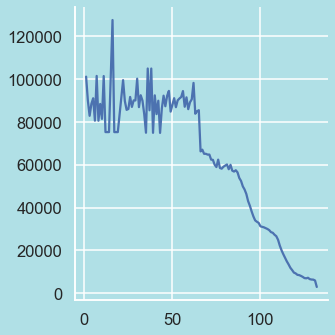

In [210]:
df=df_19[((df_19['division']=='Men')|(df_19['division']=='Women'))&(df_19['scaled_4']==0)]
a=list(df.groupby(by='w4_reps_total')['rank_4'].mean())
b=list(df.groupby(by='w4_reps_total')['w4_reps_total'])
c=[]
for i in b:
    c.append(i[0])
sns.relplot(x=c, y=a, kind="line");

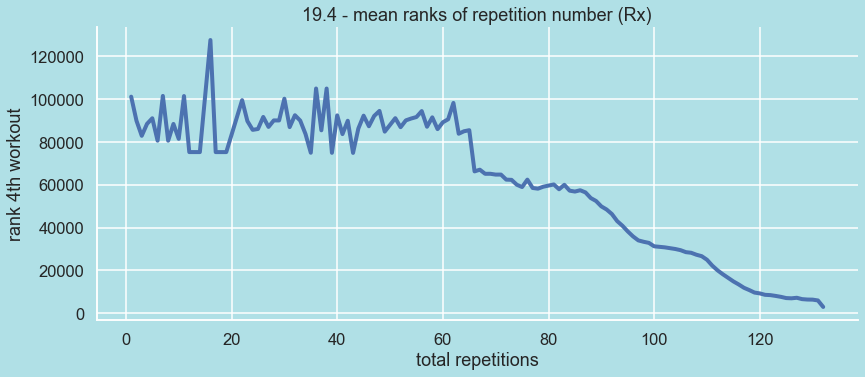

In [209]:
df=df_19[((df_19['division']=='Men')|(df_19['division']=='Women'))&(df_19['scaled_4']==0)]
a=list(df.groupby(by='w4_reps_total')['rank_4'].mean())
b=list(df.groupby(by='w4_reps_total')['w4_reps_total'])
c=[]
for i in b:
    c.append(i[0])
g = sns.relplot(x=c, y=a, kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(xlabel='total repetitions', ylabel='rank 4th workout', title= '19.4 - mean ranks of repetition number (Rx)')
plt.savefig('images/EDA/w4_rank_rx.png');

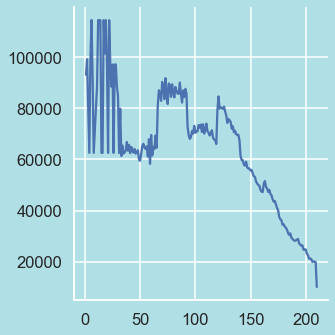

In [208]:
df=df_19[((df_19['division']=='Men')|(df_19['division']=='Women'))&(df_19['scaled_5']==0)]
a=list(df.groupby(by='w5_reps_total')['rank_5'].mean())
b=list(df.groupby(by='w5_reps_total')['w5_reps_total'])
c=[]
for i in b:
    c.append(i[0])
sns.relplot(x=c, y=a, kind="line");

---
## Impact of BMU/HSPU-Ability on Overall Rank

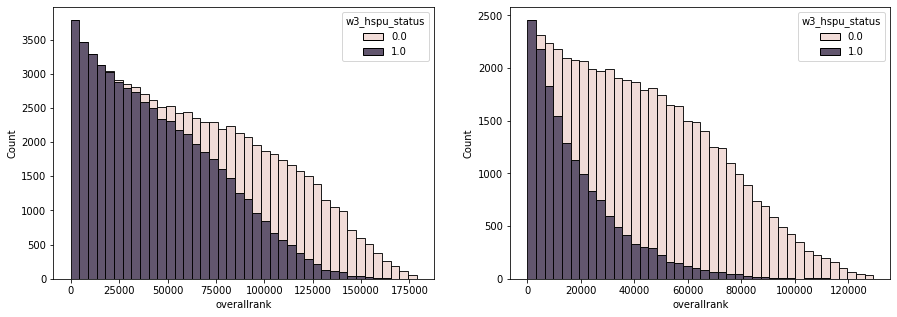

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(
    ax=axes[0],
    data=df_19[(df_19['division']=='Men')&(df_19['scaled_3']==0)],
    x='overallrank',
    hue='w3_hspu_status',
    bins=40,
    multiple='stack'
)
sns.histplot(
    ax=axes[1],
    data=df_19[(df_19['division']=='Women')&(df_19['scaled_3']==0)],
    x='overallrank',
    hue='w3_hspu_status',
    bins=40,
    multiple='stack'
);

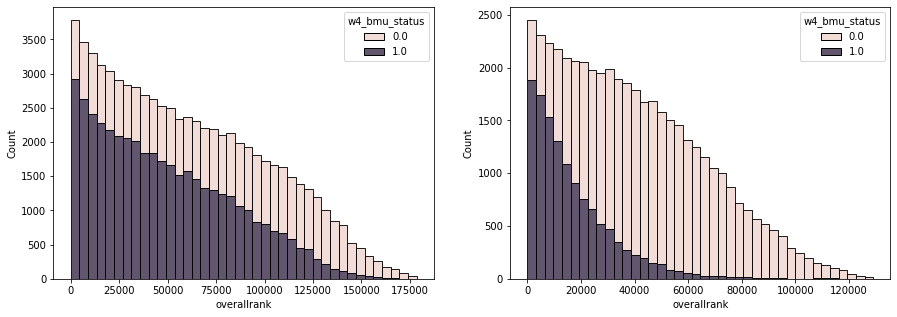

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(
    ax=axes[0],
    data=df_19[(df_19['division']=='Men')&(df_19['scaled_4']==0)],
    x='overallrank',
    hue='w4_bmu_status',
    bins=40,
    multiple='stack'
)
sns.histplot(
    ax=axes[1],
    data=df_19[(df_19['division']=='Women')&(df_19['scaled_4']==0)],
    x='overallrank',
    hue='w4_bmu_status',
    bins=40,
    multiple='stack'
);

---
## Impact of Scaling Workouts on Overall Rank

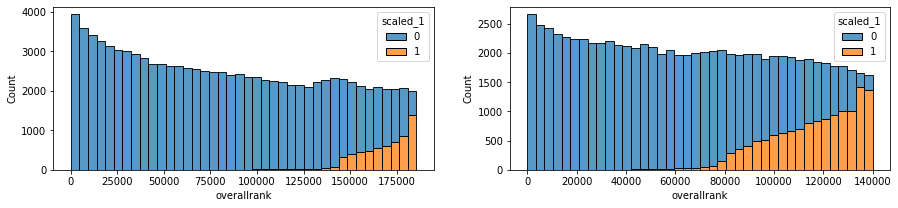

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(ax=axes[0],data=df_19[(df_19['division']=='Men')],x='overallrank',hue='scaled_1',bins=40,multiple='stack')
sns.histplot(ax=axes[1],data=df_19[(df_19['division']=='Women')],x='overallrank',hue='scaled_1',bins=40,multiple='stack');

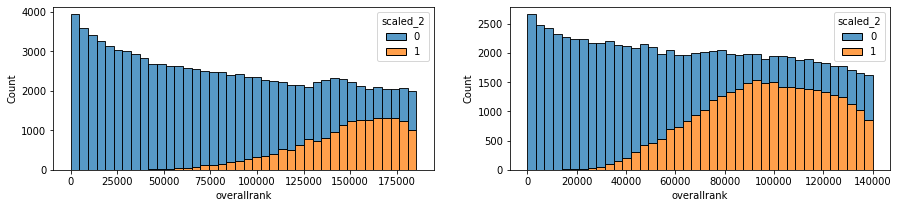

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(ax=axes[0],data=df_19[(df_19['division']=='Men')],x='overallrank',hue='scaled_2',bins=40,multiple='stack')
sns.histplot(ax=axes[1],data=df_19[(df_19['division']=='Women')],x='overallrank',hue='scaled_2',bins=40,multiple='stack');

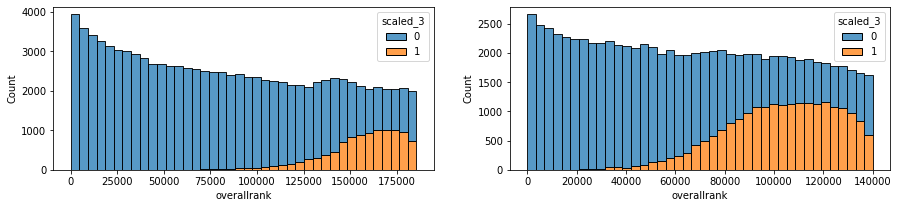

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(ax=axes[0],data=df_19[(df_19['division']=='Men')],x='overallrank',hue='scaled_3',bins=40,multiple='stack')
sns.histplot(ax=axes[1],data=df_19[(df_19['division']=='Women')],x='overallrank',hue='scaled_3',bins=40,multiple='stack');

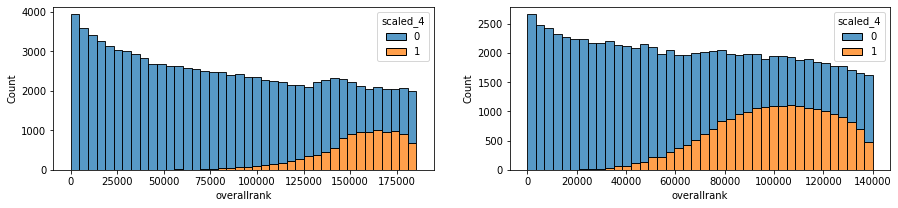

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(ax=axes[0],data=df_19[(df_19['division']=='Men')],x='overallrank',hue='scaled_4',bins=40,multiple='stack')
sns.histplot(ax=axes[1],data=df_19[(df_19['division']=='Women')],x='overallrank',hue='scaled_4',bins=40,multiple='stack');

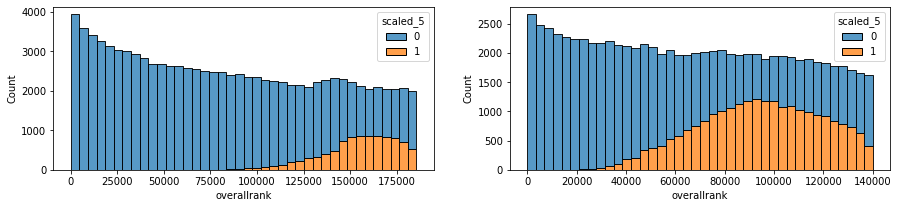

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(ax=axes[0],data=df_19[(df_19['division']=='Men')],x='overallrank',hue='scaled_5',bins=40,multiple='stack')
sns.histplot(ax=axes[1],data=df_19[(df_19['division']=='Women')],x='overallrank',hue='scaled_5',bins=40,multiple='stack');

---
## Influence of Benchmark Statistics on HSPU/BMU-Ability

In [230]:
df_19['w3_hspu_status'].replace([1.0,0.0,np.NaN],['Yes','No','unknown'],inplace=True)
df_19['w4_bmu_status'].replace([1.0,0.0,np.NaN],['Yes','No','unknown'],inplace=True)

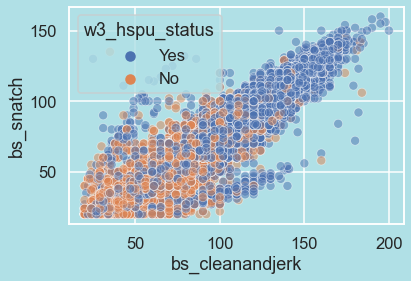

In [158]:
sns.scatterplot(data=df_19[df_19['w3_hspu_status']!='unknown'],x='bs_cleanandjerk',y='bs_snatch',hue='w3_hspu_status',
                alpha=0.5
               );

In [173]:
df_rand = df_19.sample(frac=0.002, random_state=42)

In [174]:
df_rand.shape

(677, 78)

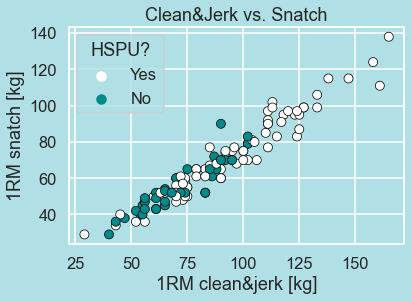

In [188]:
g = sns.scatterplot(
    data=df_rand[df_rand['w3_hspu_status']!='unknown'],
    x='bs_cleanandjerk',
    y='bs_snatch',
    hue='w3_hspu_status',
    palette={"Yes": "white", "No": "DarkCyan"},
    edgecolor='black'
)
g.legend(title="HSPU?")
g.set(xlabel='1RM clean&jerk [kg]', ylabel='1RM snatch [kg]', title= 'Clean&Jerk vs. Snatch')
plt.savefig('images/EDA/cj-sn_hspu.png');

In [238]:
df_19.columns

Index(['competitorid', 'firstname', 'lastname', 'gender',
       'countryoforiginname', 'affiliateid', 'affiliatename', 'age', 'height',
       'weight', 'overallrank', 'overallscore', 'is_scaled', 'division',
       'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'time_1', 'time_2',
       'time_3', 'time_4', 'time_5', 'scaled_1', 'scaled_2', 'scaled_3',
       'scaled_4', 'scaled_5', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'bs_backsquat', 'bs_cleanandjerk', 'bs_snatch',
       'bs_deadlift', 'bs_fightgonebad', 'bs_maxpull_ups', 'bs_fran',
       'bs_grace', 'bs_helen', 'bs_filthy50', 'bs_sprint400m', 'bs_run5k',
       'w1_reps_total', 'w1_reps_wbs', 'w1_cals_row', 'w1_rounds_completed',
       'w2_reps_total', 'w2_reps_t2b', 'w2_reps_du', 'w2_reps_sqcl',
       'w2_rounds_completed', 'w2_tiebreak', 'w3_reps_total',
       'w3_5ft_reps_ohl', 'w3_reps_dbbsu', 'w3_reps_hspu', 'w3_hspu_status',
       'w3_5ft_reps_hsw', 'w3_rounds_completed', 'w3_tiebreak',
     

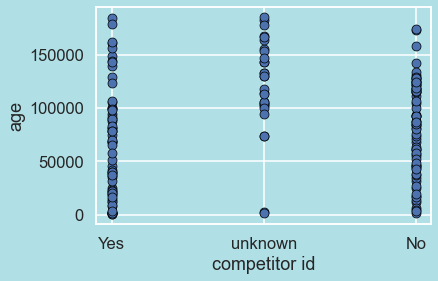

In [289]:
df_rand = df_19.sample(frac=0.0005, random_state=42)
g = sns.scatterplot(
    data=df_rand,
    x='w4_bmu_status',
    y='overallrank',
    #hue='w3_hspu_status',
    #palette={"Yes": "white", "No": "DarkCyan"},
    edgecolor='black'
)
#g.legend(title="HSPU?")
g.set(xlabel='competitor id', ylabel='age', title= '');

---
## Influence of Athlete's Statistics on HSPU/BMU-Ability

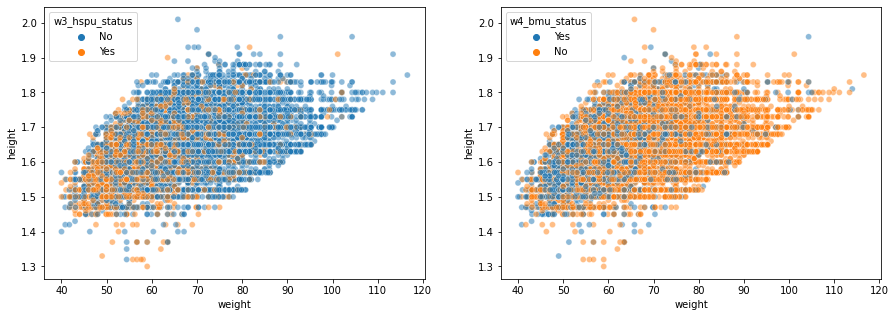

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(
    ax=axes[0],
    data=df_19[(df_19['gender']!='M')&(df_19['w3_hspu_status']!='unknown')],
    x='weight',
    y='height',
    hue='w3_hspu_status',
    alpha=0.5
)
sns.scatterplot(
    ax=axes[1],
    data=df_19[(df_19['gender']!='M')&(df_19['w4_bmu_status']!='unknown')],
    x='weight',
    y='height',
    hue='w4_bmu_status',
    alpha=0.5
);

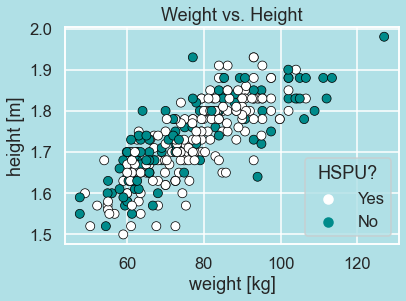

In [199]:
g = sns.scatterplot(
    data=df_rand[df_rand['w3_hspu_status']!='unknown'],
    x='weight',
    y='height',
    hue='w3_hspu_status',
    palette={"Yes": "white", "No": "DarkCyan"},
    edgecolor='black'
)
g.legend(title="HSPU?")
g.set(xlabel='weight [kg]', ylabel='height [m]', title= 'Weight vs. Height')
plt.savefig('images/EDA/weight-height_hspu.png');

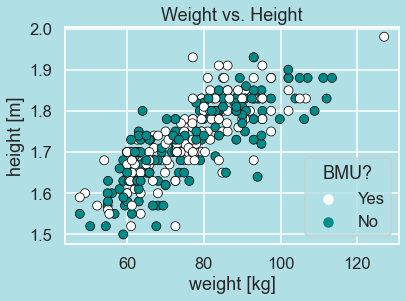

In [200]:
g = sns.scatterplot(
    data=df_rand[df_rand['w4_bmu_status']!='unknown'],
    x='weight',
    y='height',
    hue='w4_bmu_status',
    palette={"Yes": "white", "No": "DarkCyan"},
    edgecolor='black'
)
g.legend(title="BMU?")
g.set(xlabel='weight [kg]', ylabel='height [m]', title= 'Weight vs. Height')
plt.savefig('images/EDA/weight-height_bmu.png');

In [50]:
df_19['w3_hspu_status'].replace(['Yes','No','unknown'],[1.0,0.0,np.NaN],inplace=True)
df_19['w4_bmu_status'].replace(['Yes','No','unknown'],[1.0,0.0,np.NaN],inplace=True)

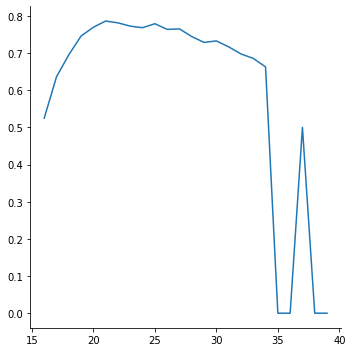

In [51]:
df_m=df_19[(df_19['scaled_3']==0)&(df_19['division']=='Men')]
a_m=list(df_m.groupby(by='age')['w3_hspu_status'].mean())
b_m=list(df_m.groupby(by='age')['age'])
c_m=[]
for i in b_m:
    c_m.append(i[0])
sns.relplot(x=c_m, y=a_m, kind="line");

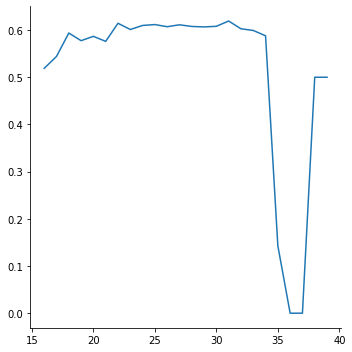

In [52]:
df_m=df_19[(df_19['scaled_3']==0)&(df_19['division']=='Men')]
a_m=list(df_m.groupby(by='age')['w4_bmu_status'].mean())
b_m=list(df_m.groupby(by='age')['age'])
c_m=[]
for i in b_m:
    c_m.append(i[0])
sns.relplot(x=c_m, y=a_m, kind="line");

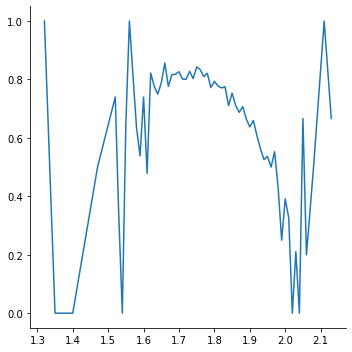

In [53]:
df_m=df_19[(df_19['scaled_3']==0)&(df_19['division']=='Men')]
a_m=list(df_m.groupby(by='height')['w3_hspu_status'].mean())
b_m=list(df_m.groupby(by='height')['height'])
c_m=[]
for i in b_m:
    c_m.append(i[0])
sns.relplot(x=c_m, y=a_m, kind="line");

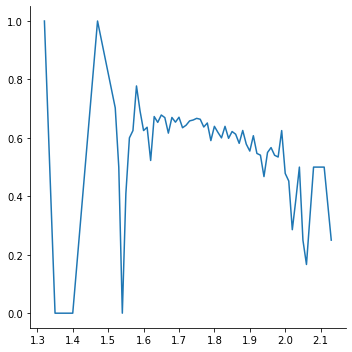

In [54]:
df_m=df_19[(df_19['scaled_3']==0)&(df_19['division']=='Men')]
a_m=list(df_m.groupby(by='height')['w4_bmu_status'].mean())
b_m=list(df_m.groupby(by='height')['height'])
c_m=[]
for i in b_m:
    c_m.append(i[0])
sns.relplot(x=c_m, y=a_m, kind="line");

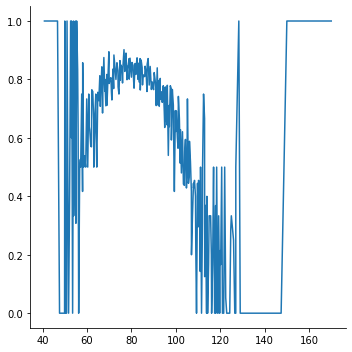

In [55]:
df_m=df_19[(df_19['scaled_3']==0)&(df_19['division']=='Men')]
a_m=list(df_m.groupby(by='weight')['w3_hspu_status'].mean())
b_m=list(df_m.groupby(by='weight')['weight'])
c_m=[]
for i in b_m:
    c_m.append(i[0])
sns.relplot(x=c_m, y=a_m, kind="line");

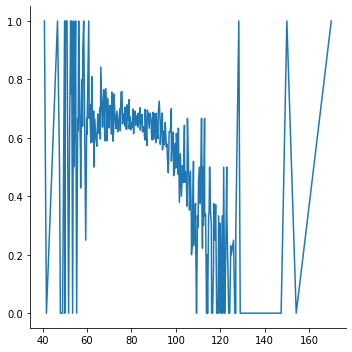

In [56]:
df_m=df_19[(df_19['scaled_3']==0)&(df_19['division']=='Men')]
a_m=list(df_m.groupby(by='weight')['w4_bmu_status'].mean())
b_m=list(df_m.groupby(by='weight')['weight'])
c_m=[]
for i in b_m:
    c_m.append(i[0])
sns.relplot(x=c_m, y=a_m, kind="line");

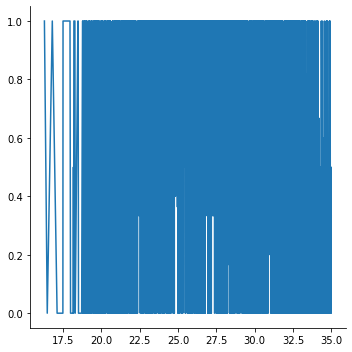

In [57]:
df_m=df_19[(df_19['scaled_3']==0)&(df_19['division']=='Men')]
a_m=list(df_m.groupby(by='BMI')['w3_hspu_status'].mean())
b_m=list(df_m.groupby(by='BMI')['BMI'])
c_m=[]
for i in b_m:
    c_m.append(i[0])
sns.relplot(x=c_m, y=a_m, kind="line");

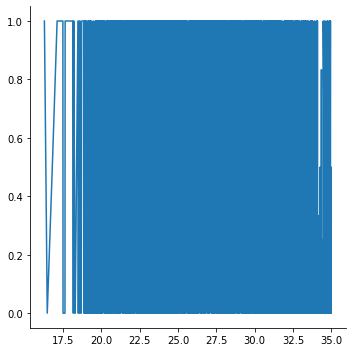

In [58]:
df_m=df_19[(df_19['scaled_3']==0)&(df_19['division']=='Men')]
a_m=list(df_m.groupby(by='BMI')['w4_bmu_status'].mean())
b_m=list(df_m.groupby(by='BMI')['BMI'])
c_m=[]
for i in b_m:
    c_m.append(i[0])
sns.relplot(x=c_m, y=a_m, kind="line");